## 1. Data Exploration

In [1]:
import sys
import os

# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Import preprocessing module
from src.data.preprocessing import load_dataset

csv_path = os.path.join(project_root, "data", "raw", "Clean_Dataset.csv")

df = load_dataset(csv_path)

In [4]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Features that need to be considered that affect price flight: airline, source_city, destination_city, departure_time, arrival_time, stops, class, duration, days_left

Target variable: price

##### Evaluate and have an idea how many different values per feature using .value_counts() for categorical and/or nominal, and min, max, median for numerical.

In [5]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [6]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [7]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [8]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [9]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

For these features that only have few different distinct values, OneHotEncoding could be the best approach.

In [10]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

For the 'stops' feature, since its values are one, zero, and two_or_more ordinal encoding could be the best approach.

In [11]:
df['class'].value_counts() # df.class won't run because 'class' is a python keyword

class
Economy     206666
Business     93487
Name: count, dtype: int64

Since class feature only has two values (Economy and Business), binary encoding could be the best approach assigning Economy as 0 and Business as 1.

In [12]:
print('duration min: ',df.duration.min())
print('duration max: ',df.duration.max())
print('duration median: ',df.duration.median())

duration min:  0.83
duration max:  49.83
duration median:  11.25


In [13]:
print('days_left min: ',df.days_left.min())
print('days_left max: ',df.days_left.max())
print('days_left median: ',df.days_left.median())

days_left min:  1
days_left max:  49
days_left median:  26.0


For the numerical features (duration and days_left), it's best to keep them as it is for now.

## 2. Preprocessing

In [14]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Dropping the features that are not needed for this project (Unnamed: 0, flight)

In [15]:
df = df.drop(['Unnamed: 0', 'flight'], axis = 1)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Apply binary encoding for the class feature (Business = 1, Economy = 0)

In [16]:
df['class'] = df['class'].apply(lambda x: 1 if (x == 'Business') or (x == 1) else 0)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585


Factorize the stops feature so zero = 0, one = 1, and two_or_more = 2

In [17]:
df.stops = pd.factorize(df.stops)[0]
df.stops.value_counts()

stops
1    250863
0     36004
2     13286
Name: count, dtype: int64

In [18]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


The rest of the remaining features will be OneHotEncoded (airline, source_city, departure_time, arrival_time, destination_city)

In [19]:
cols_to_one_hot = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
def one_hot_encode(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col], prefix = col, dtype = int)
        df = df.drop(col, axis = 1).join(dummies)
    return df

df = one_hot_encode(df, cols_to_one_hot)
pd.set_option('display.max_columns', None)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,5956,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [20]:
# Save the cleaned and encoded dataset
df.to_csv("../data/processed/Processed_Dataset.csv", index=False)

print("✅ Processed dataset saved successfully at: ../data/processed/Processed_Dataset.csv")

✅ Processed dataset saved successfully at: ../data/processed/Processed_Dataset.csv


Now, the dataframe is ready for training.

## 3. Training Model

Using train_test_split and RandomForestRegressor

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Splitting the features to X (independent variables) and y (dependent variable: price)

In [22]:
X, y = df.drop('price', axis = 1), df['price']

In [23]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
300150,1,1,13.83,49,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
300151,1,1,10.00,49,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [24]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

Now, train_test_split the data (80% for training, 20% for testing).

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
# Initializing the RandomForestRegressor
reg_default = RandomForestRegressor(n_jobs = -1)

# Fitting the X_train and y_train
reg_default.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
# Evaluate the model using the test data
reg_default.score(X_test, y_test)

0.9852122491951556

Getting some more metrics to evaluate the accuracy of the model using the mean_absolute_error (MAE), mean_squared_error (MSE), root mean_squared_error (RMSE), and r2_score ($R^2$ score).

In [30]:
import math #for sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
y_pred = reg_default.predict(X_test)

print('R\u00b2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R² Score:  0.9852122491951556
MAE:  1070.77834889871
MSE:  7587296.002998353
RMSE:  2754.5046747098386


In [32]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

linear_regression.score(X_test, y_test)

0.9095068841830364

Stick to RandomForestRegressor since it performed better in terms of $R^2$ score.

## 4. Data Visualizations

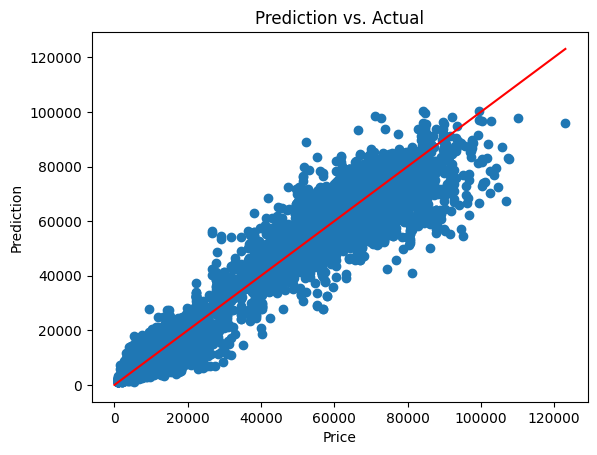

In [36]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color='r')
plt.xlabel('Price')
plt.ylabel('Prediction')
plt.title('Prediction vs. Actual')
plt.savefig('../reports/training_outputs/Prediction-vs-Actual.png', bbox_inches='tight', dpi=300)

In [38]:
# Saves the sorted list of features and their importance values, ordered from most important to least important.
feature_importances = sorted(zip(reg.feature_names_in_, reg.feature_importances_), key = lambda x: x[1], reverse = True)

In [42]:
feature_importances

[('class', np.float64(0.8800330641063803)),
 ('duration', np.float64(0.0574691061926291)),
 ('days_left', np.float64(0.018509784471933455)),
 ('airline_Air_India', np.float64(0.00526459204824593)),
 ('airline_Vistara', np.float64(0.004732443771914747)),
 ('source_city_Delhi', np.float64(0.003764425123329796)),
 ('destination_city_Delhi', np.float64(0.003335809091476296)),
 ('source_city_Mumbai', np.float64(0.0022292655043415037)),
 ('destination_city_Mumbai', np.float64(0.001922640220865677)),
 ('destination_city_Kolkata', np.float64(0.0018583233064906335)),
 ('stops', np.float64(0.00184736594684346)),
 ('source_city_Kolkata', np.float64(0.001759580777756278)),
 ('arrival_time_Evening', np.float64(0.0014930170778384689)),
 ('destination_city_Hyderabad', np.float64(0.0014716387398788927)),
 ('destination_city_Bangalore', np.float64(0.0012756569954666414)),
 ('source_city_Hyderabad', np.float64(0.001256879424029104)),
 ('departure_time_Evening', np.float64(0.001146494638618979)),
 ('arri

## 5. Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6]
}

reg = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(reg, param_grid = param_grid, cv=5)

In [44]:
grid_search.fit(X_train, y_train)

,estimator,RandomForestR...sor(n_jobs=-1)
,param_grid,"{'max_depth': [None, 2, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [48]:
grid_search.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8}

In [49]:
reg_grid_search = grid_search.best_estimator_
reg_grid_search

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,8
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
reg_grid_search.score(X_test, y_test)

0.9863144026158603

In [51]:
y_pred_grid_search = reg_grid_search.predict(X_test)

In [56]:
print('R\u00b2 Score: ', r2_score(y_test, y_pred_grid_search))
print('MAE: ', mean_absolute_error(y_test, y_pred_grid_search))
print('MSE: ', mean_squared_error(y_test, y_pred_grid_search))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred_grid_search)))

R² Score:  0.9863144026158603
MAE:  1094.0142350041328
MSE:  7021803.362909758
RMSE:  2649.8685557796557


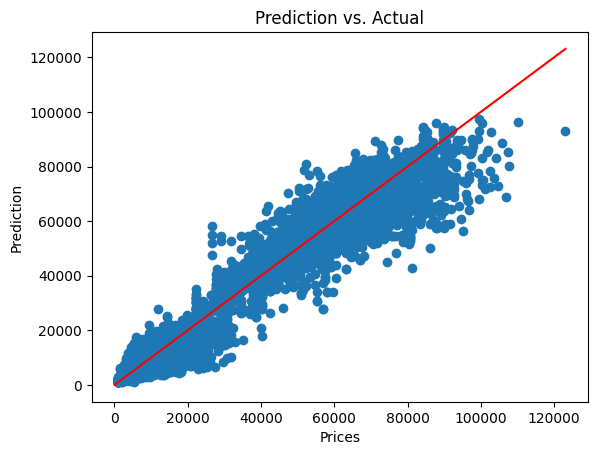

In [57]:
plt.scatter(y_test, y_pred_grid_search)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color='r')
plt.xlabel('Prices')
plt.ylabel('Prediction')
plt.title('Prediction vs. Actual')
plt.savefig('../reports/cross_validated_outputs/Prediction-vs-Actual.png', bbox_inches='tight', dpi=300)